In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [8]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5), 
    Dense(10, activation='softmax') 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 42s 53ms/step - loss: 0.3893 - accuracy: 0.8795 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 2/5
750/750 [==============================] - 35s 47ms/step - loss: 0.1502 - accuracy: 0.9553 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 3/5
750/750 [==============================] - 31s 42ms/step - loss: 0.1103 - accuracy: 0.9673 - val_loss: 0.0469 - val_accuracy: 0.9879
Epoch 4/5
750/750 [==============================] - 31s 42ms/step - loss: 0.0908 - accuracy: 0.9735 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 5/5
750/750 [==============================] - 34s 45ms/step - loss: 0.0819 - accuracy: 0.9749 - val_loss: 0.0403 - val_accuracy: 0.9890


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 4s - loss: 0.0319 - accuracy: 0.9887 - 4s/epoch - 11ms/step

Test accuracy: 0.9887
Test loss: 0.0319


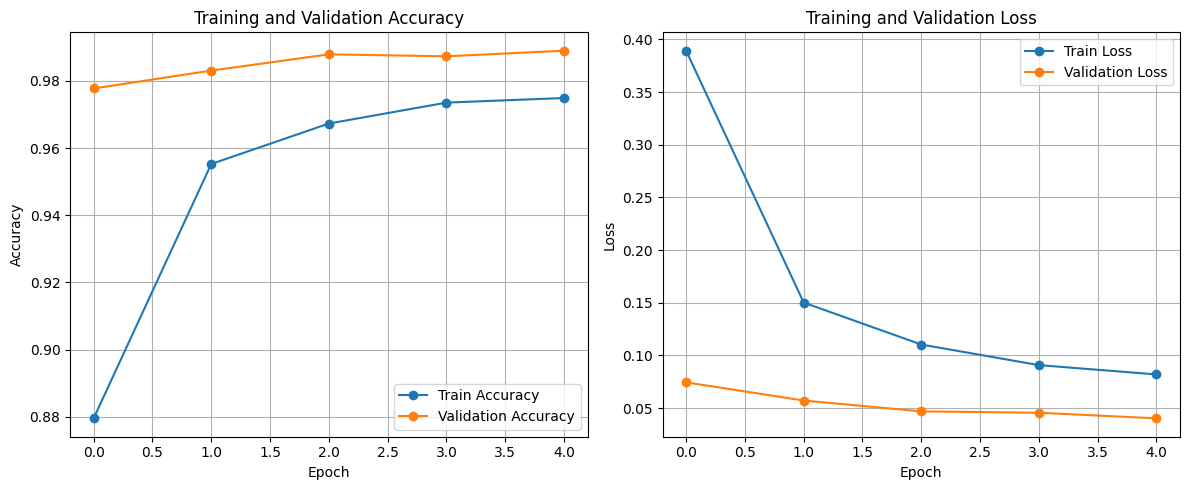

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 [==============================] - 3s 10ms/step


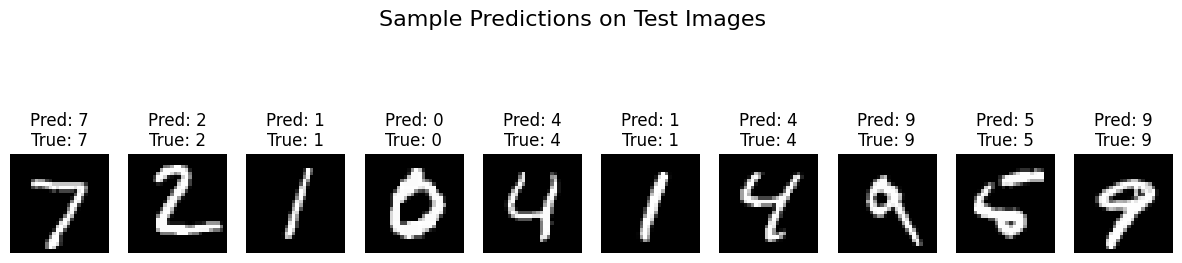

In [13]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

num_samples = 10
plt.figure(figsize=(15, 4))
plt.suptitle("Sample Predictions on Test Images", fontsize=16)

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')

plt.show()